# Q1

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

SPX = pd.read_excel('SPX.xlsx', skiprows=5)
SPX['Dates'] = pd.to_datetime(SPX['Dates'])


In [32]:
na_mask = SPX.isna().iloc[:,1:4].any(axis=1)
SPX[na_mask]

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D
30,1928-02-13,NaN,NaN,NaN,NaN,11.51,NaN
37,1928-02-22,NaN,NaN,NaN,NaN,12.36,NaN
69,1928-04-06,NaN,NaN,NaN,NaN,12.90,12.70
107,1928-05-30,NaN,NaN,NaN,NaN,16.09,14.11
132,1928-07-04,NaN,NaN,NaN,NaN,22.40,17.57
...,...,...,...,...,...,...,...
11564,1972-12-28,NaN,NaN,NaN,NaN,7.34,8.51
11583,1973-01-25,NaN,NaN,NaN,NaN,9.42,8.82
12537,1976-11-02,NaN,NaN,NaN,NaN,11.80,10.11
12713,1977-07-14,NaN,NaN,NaN,NaN,7.62,9.27


In [33]:
SPX_no_NA = SPX[na_mask == False]
low_high_mask = SPX_no_NA['PX_LOW'] >= SPX_no_NA['PX_HIGH']
SPX_no_NA[low_high_mask]
SPX_2 = SPX_no_NA[low_high_mask == False].reset_index(drop = True)

In [34]:
prev = SPX_2.iloc[:,1:5].shift(1)
no_change_mask = (prev == SPX_2.iloc[:,1:5]).all(axis = 1)
SPX_2[no_change_mask]

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D


In [35]:
SPX_final = SPX_2
SPX_final[SPX_final['PX_OPEN'] == SPX_final['PX_HIGH']]

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D
33,1982-06-08,110.33,109.63,110.33,109.60,10.12,13.34
41,1982-06-18,107.60,107.28,107.60,107.07,10.78,12.60
68,1982-07-28,109.42,107.73,109.42,107.53,12.34,11.85
73,1982-08-04,107.83,106.14,107.83,106.11,12.80,12.43
74,1982-08-05,106.10,105.16,106.10,104.76,13.02,12.51
...,...,...,...,...,...,...,...
9892,2021-07-15,4369.02,4360.03,4369.02,4340.70,9.00,11.16
9894,2021-07-19,4296.40,4258.49,4296.40,4233.13,10.37,11.50
9900,2021-07-27,4416.38,4401.46,4416.38,4372.51,11.83,11.58
9915,2021-08-17,4462.12,4448.08,4462.12,4417.83,10.63,10.87


In [36]:
SPX_final[SPX_final['PX_OPEN'] == SPX_final['PX_LOW']]

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D
1,1982-04-22,115.72,117.19,117.25,115.72,11.74,14.95
57,1982-07-13,109.19,109.45,110.07,109.19,13.22,12.63
60,1982-07-16,110.16,111.07,111.48,110.16,12.70,12.09
85,1982-08-20,109.19,113.02,113.03,109.19,21.91,16.02
89,1982-08-26,117.57,118.55,120.26,117.57,23.91,16.98
...,...,...,...,...,...,...,...
9907,2021-08-05,4408.86,4429.10,4429.76,4408.86,10.64,11.25
9908,2021-08-06,4429.07,4436.52,4440.82,4429.07,10.63,11.24
9919,2021-08-23,4450.29,4479.53,4489.88,4450.29,10.74,11.01
9923,2021-08-27,4474.10,4509.37,4513.33,4474.10,9.36,10.80


In [37]:
SPX_final['intra_range'] = (SPX_final['PX_HIGH'] - SPX_final['PX_LOW']) / SPX_final['PX_LOW']
SPX_intra_range_sorted = SPX_final.sort_values('intra_range',ascending=False)
SPX_intra_top = SPX_intra_range_sorted.head(20)
SPX_intra_top

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D,intra_range
1391,1987-10-19,282.70,224.84,282.70,224.83,72.37,43.12,0.257394
1392,1987-10-20,225.06,236.83,245.62,216.46,74.75,44.12,0.134713
6705,2008-11-13,853.13,911.29,913.01,818.69,80.72,55.24,0.115208
6681,2008-10-10,902.31,899.22,936.36,839.80,55.92,37.13,0.114980
6693,2008-10-28,848.92,940.51,940.51,845.27,81.54,51.11,0.112674
6680,2008-10-09,988.42,909.92,1005.25,909.19,55.92,37.34,0.105654
6682,2008-10-13,912.75,1003.35,1006.93,912.75,66.76,41.70,0.103183
6684,2008-10-15,994.60,907.84,994.60,903.99,71.33,44.52,0.100233
6710,2008-11-20,805.87,752.44,820.52,747.78,80.69,57.46,0.097275
7075,2010-05-06,1164.38,1128.15,1167.58,1065.79,18.52,16.14,0.095507


In [41]:
SPX_final['overnight'] = SPX_final['PX_OPEN'] / SPX_final['PX_LAST'].shift(1) - 1
SPX_overnight_sorted = SPX_final.sort_values('overnight',ascending=False)
SPX_overnight_sorted.head(20)

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D,intra_range,r,j,overnight
9562,2020-03-24,2344.44,2447.33,2449.71,2344.44,80.28,46.93,0.044902,0.089683,0.001117,0.047841
9555,2020-03-13,2569.99,2711.02,2711.33,2492.37,60.08,35.04,0.087852,0.088808,0.001478,0.036019
9571,2020-04-06,2578.28,2663.68,2676.85,2574.57,87.99,51.11,0.039727,0.067968,0.000772,0.036016
9572,2020-04-07,2738.65,2659.41,2756.89,2657.67,87.99,51.10,0.037333,-0.001604,-0.000018,0.028145
9552,2020-03-10,2813.48,2882.23,2882.59,2734.00,42.33,25.17,0.054349,0.048215,0.001139,0.024365
9618,2020-06-12,3071.04,3041.31,3088.42,2984.47,27.45,54.97,0.034830,0.012976,0.000473,0.022964
9620,2020-06-16,3131.00,3124.74,3153.45,3076.06,27.86,55.08,0.025159,0.018785,0.000674,0.021004
9722,2020-11-09,3583.04,3550.50,3645.99,3547.48,21.72,18.85,0.027769,0.011632,0.000536,0.020972
9587,2020-04-29,2918.46,2939.51,2954.86,2912.16,52.52,52.90,0.014663,0.026237,0.000500,0.019232
9582,2020-04-22,2787.89,2799.31,2815.10,2775.95,80.85,52.58,0.014103,0.022671,0.000280,0.018757


In [38]:
SPX_final['r'] = np.log(SPX_final['PX_LAST'].pct_change()+1)
SPX_final['j'] = SPX_final['r'] / SPX_final['VOLATILITY_30D']
SPX_return_sorted = SPX_final.sort_values('j',ascending=False)

In [39]:
SPX_return_sorted.head(20)

,Dates,PX_OPEN,PX_LAST,PX_HIGH,PX_LOW,VOLATILITY_30D,VOLATILITY_90D,intra_range,r,j
82,1982-08-17,105.40,109.04,109.33,104.32,19.58,14.80,0.048025,0.046459,0.002373
2211,1991-01-17,316.17,327.97,327.97,316.17,16.54,18.64,0.037322,0.036642,0.002215
8714,2016-11-07,2100.59,2131.52,2132.00,2100.59,10.26,10.01,0.014953,0.021980,0.002142
675,1984-12-18,163.61,168.11,168.11,163.61,12.72,11.92,0.027504,0.027133,0.002133
1546,1988-05-31,253.44,262.16,262.16,253.42,16.49,17.80,0.034488,0.033907,0.002056
117,1982-10-06,122.00,126.97,126.97,122.00,19.74,19.18,0.040738,0.040094,0.002031
8791,2017-03-01,2380.13,2395.96,2400.98,2380.13,6.72,7.90,0.008760,0.013581,0.002021
1787,1989-05-12,306.99,313.84,313.84,306.95,11.27,11.53,0.022447,0.022198,0.001970
2361,1991-08-21,379.59,390.59,390.59,379.43,14.72,13.68,0.029413,0.028988,0.001969
7744,2013-01-02,1426.19,1462.42,1462.43,1426.19,13.10,13.00,0.025410,0.025086,0.001915


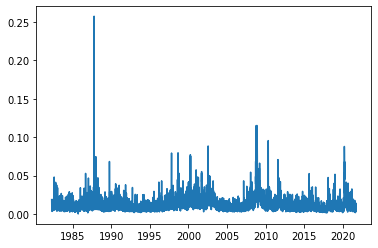

In [47]:
plt.plot(SPX_final['Dates'], SPX_final['intra_range'])

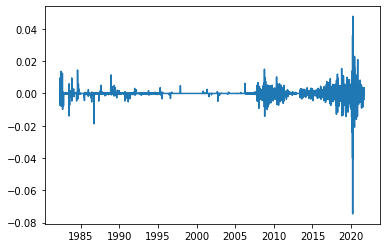

In [48]:
plt.plot(SPX_final['Dates'], SPX_final['overnight'])